# Show_OLP_data

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import package_DBR
from package_DBR import myRound, FOPDT, SOPDT, Process, Bode

# Load data

In [59]:
Directory = 'Data/'

nameFile = 'Open_loop_experiment_on_MV_2023-03-14-09h42.txt'

if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'

titleName = nameFile.split('.')[0]    
data = pd.read_csv(Directory + nameFile)

t = data['t'].values - data['t'].values[0]
MV = data['MV'].values
PV = data['PV'].values
DV = data['DV'].values

# Plot loaded data

(45.0, 55.0)

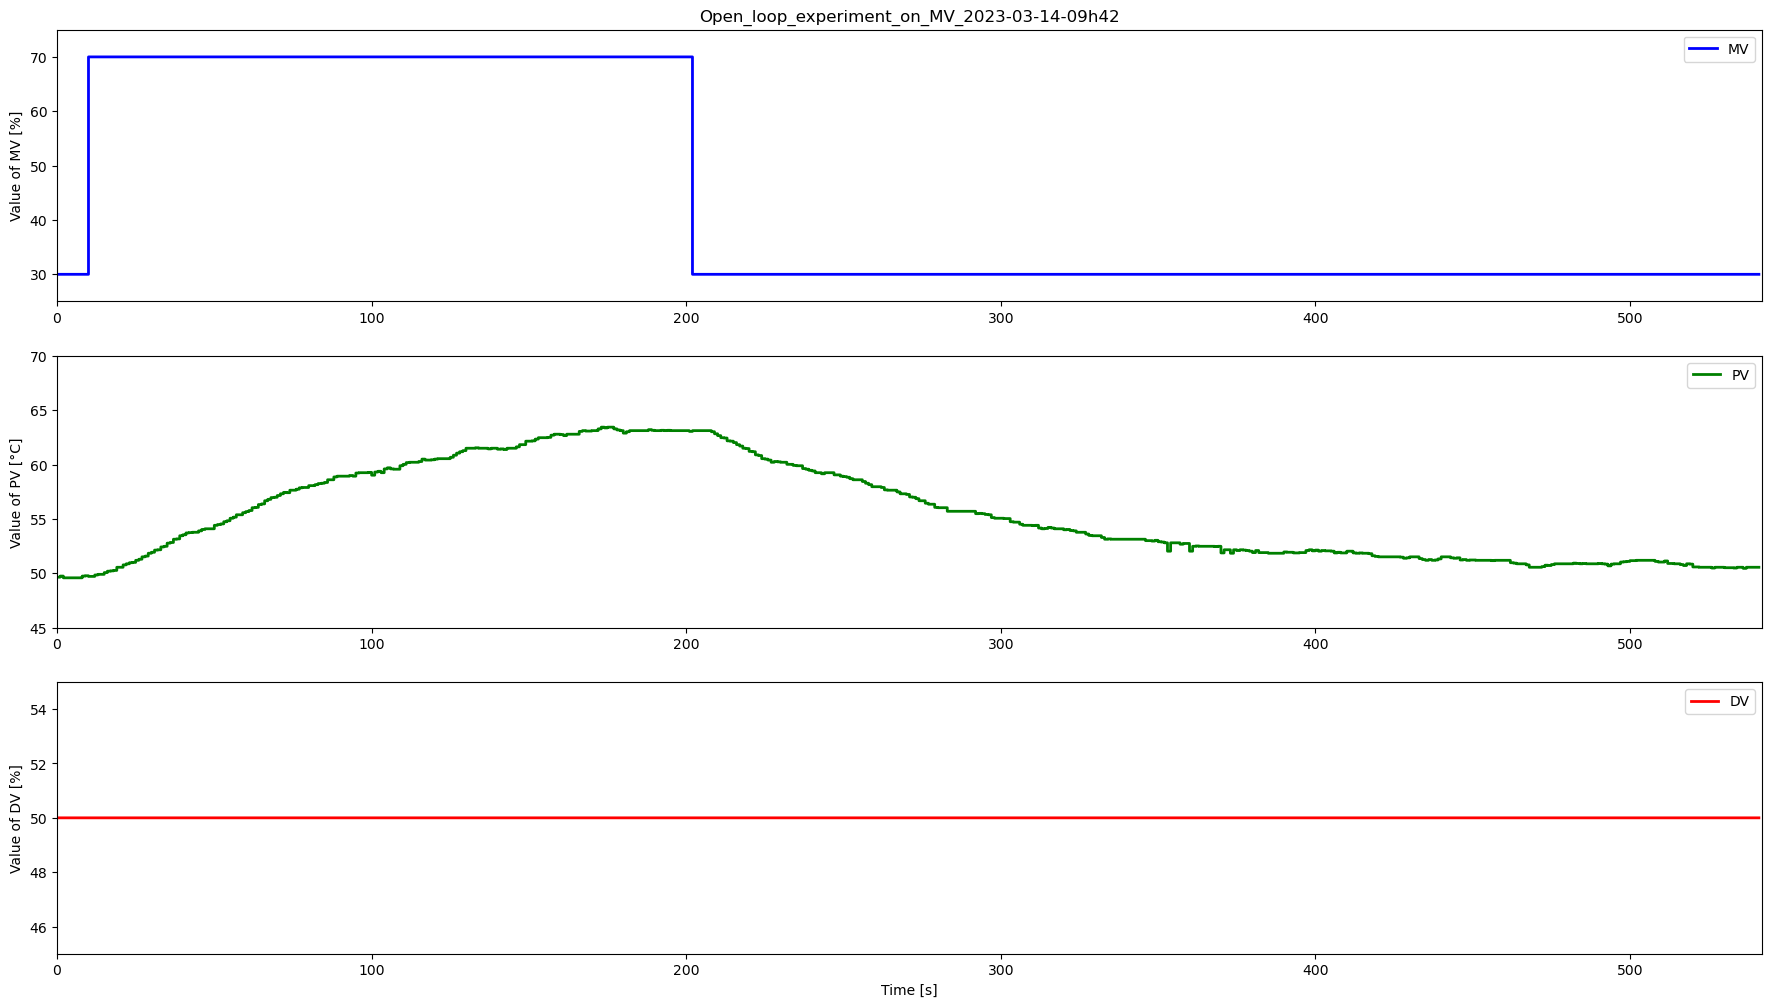

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(12)
fig.set_figwidth(22)

l1, = ax1.step([0,1],[0,100],'b-',linewidth=2,label='MV',where='post')
ax1.set_ylabel('Value of MV [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')

l2, = ax2.step([0,1],[0,100],'g-',linewidth=2,label='PV',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')

l3, = ax3.step([0,1],[0,100],'r-',linewidth=2,label='DV',where='post')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of DV [%]')
ax3.legend(loc='best')

l1.set_data(t,MV)
l2.set_data(t,PV)
l3.set_data(t,DV)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)
ax3.set_xlim(0, t[-1]+1)

ax1.set_ylim(myRound(np.min(MV),5)-5, myRound(np.max(MV),5)+5)
ax2.set_ylim(myRound(np.min(PV),5)-5, myRound(np.max(PV),5)+5)
ax3.set_ylim(myRound(np.min(DV),5)-5, myRound(np.max(DV),5)+5)

# if not os.path.exists('Plots'):
#     os.makedirs('Plots')

# plt.savefig('Plots\\' + titleName + '.png',transparent=True)
# plt.savefig('Plots\\' + titleName + '.pdf',transparent=True) 

# Clean data

In [61]:
if ExpVariable == 'MV':
    tstep = np.argwhere(np.diff(MV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]    
    MVstep = MV[tstep + 1] - MV[tstep]
    MVm = MV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/MVstep
    MVm = (MVm - MVm[0])/MVstep    
else:    
    tstep = np.argwhere(np.diff(DV) != 0)
    tstep = tstep[0][0]
    tm = t[tstep:]
    tm = tm - tm[0]
    DVstep = DV[tstep + 1] - DV[tstep]    
    DVm = DV[tstep:]
    PVm = PV[tstep:]
    PVm = (PVm - PVm[0])/DVstep
    DVm = (DVm - DVm[0])/DVstep

# Plot cleaned data

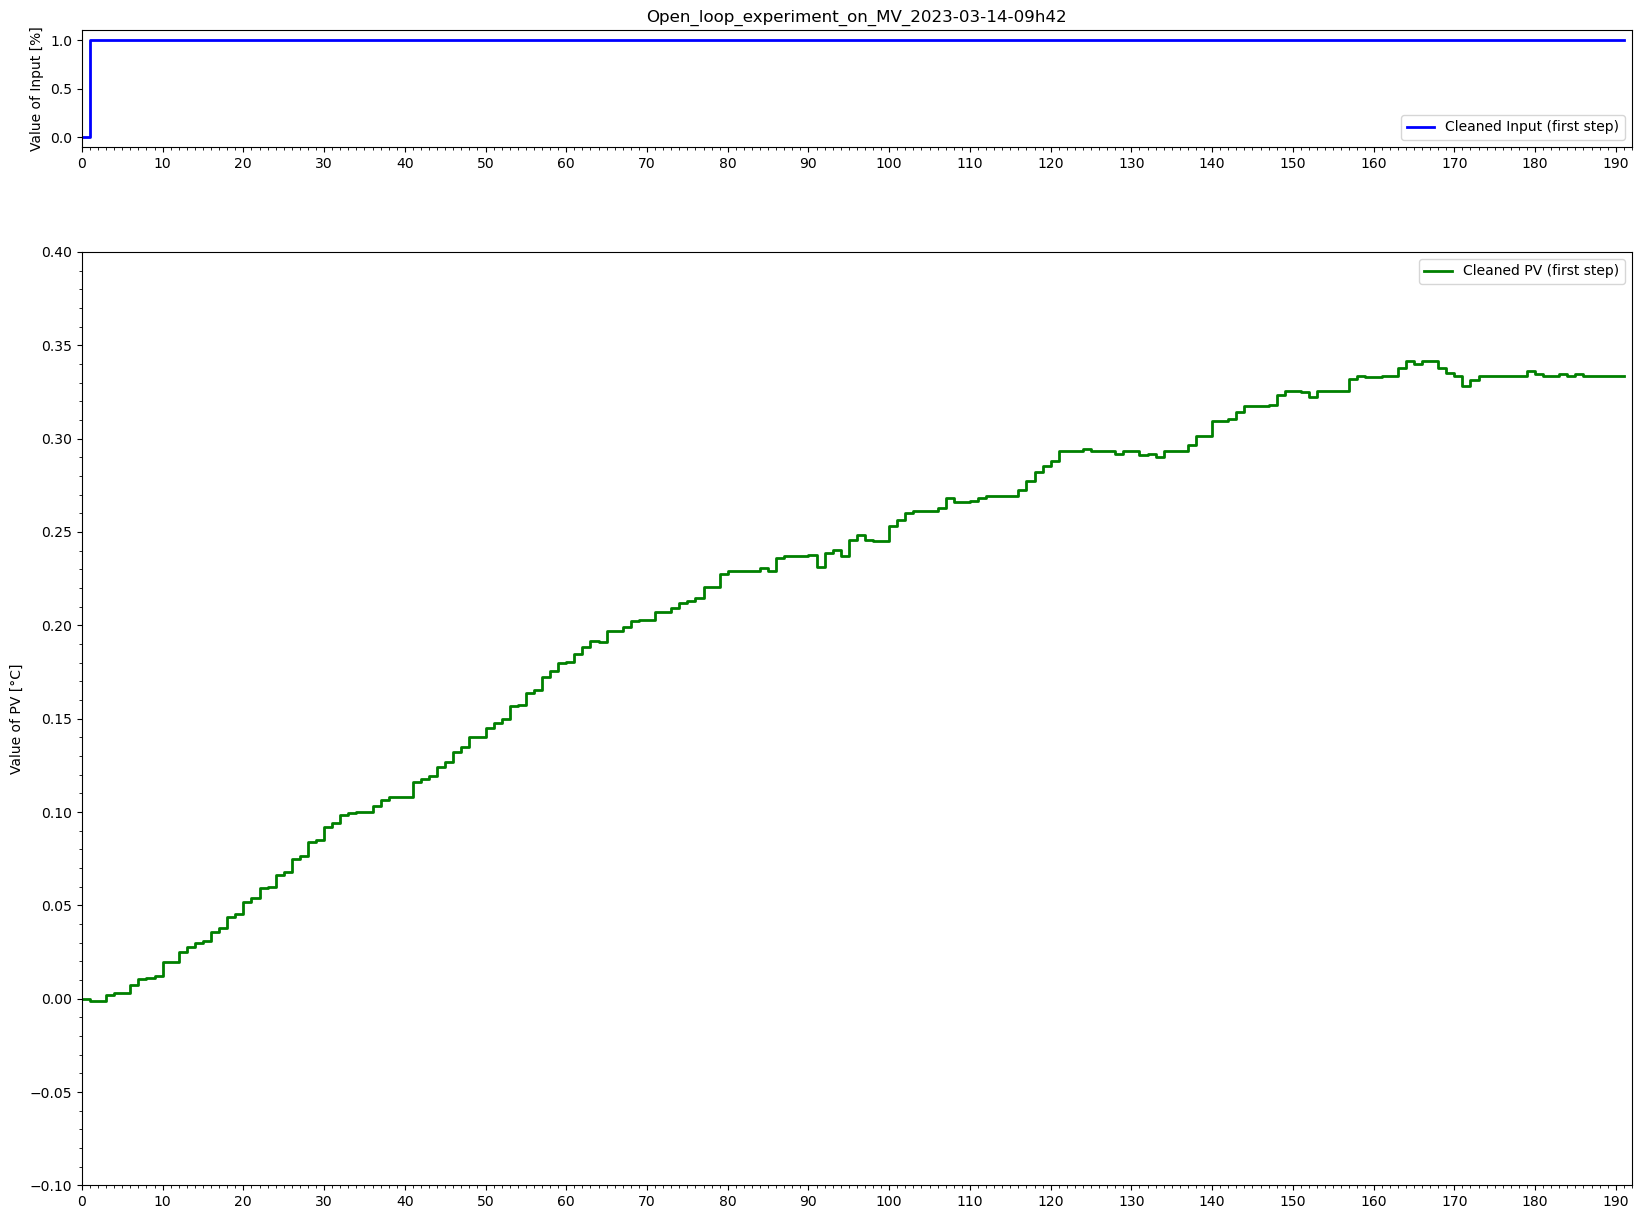

In [62]:
if ExpVariable == 'MV':
    Input = MVm
else:
    Input = DVm
    
DInput = np.diff(Input)
Index = np.where(np.diff(Input) != 0)[0]

Input = Input[0:Index[-1]]
Output = PVm[0:Index[-1]]
t = tm[0:Index[-1]]

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw={'height_ratios': [1, 8]})
fig.set_figheight(15)
fig.set_figwidth(20)

l1, = ax1.step([0,1],[0,1],'b-',linewidth=2,label='Cleaned Input (first step)',where='post')
ax1.set_ylabel('Value of Input [%]')
ax1.set_title(titleName)
ax1.legend(loc='best')
l1.set_data(t,Input)
ax1.set_ylim(myRound(np.min(Input),1)-0.1, myRound(np.max(Input),1)+0.1)  

l2, = ax2.step([0,1],[0,1],'g-',linewidth=2,label='Cleaned PV (first step)',where='post')
ax2.set_ylabel('Value of PV [°C]')
ax2.legend(loc='best')
l2.set_data(t,Output)
ax2.set_ylim(myRound(np.min(Output),0.1)-0.1, myRound(np.max(Output),0.1)+0.1)

ax1.set_xlim(0, t[-1]+1)
ax2.set_xlim(0, t[-1]+1)

# Axis minor and major ticks
multiplier = 10
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_major_locator(locator)    
ax2.xaxis.set_major_locator(locator)

multiplier = 1
locator = plt.MultipleLocator(multiplier)
ax1.xaxis.set_minor_locator(locator)    
ax2.xaxis.set_minor_locator(locator)    
    
multiplier = 0.05
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_major_locator(locator)
    
multiplier = 0.01
locator = plt.MultipleLocator(multiplier)
ax2.yaxis.set_minor_locator(locator)

if not os.path.exists('Plots'):
    os.makedirs('Plots')

plt.savefig('Plots\Graphical_methods_' + titleName + '.png',transparent=True)
plt.savefig('Plots\Graphical_methods_' + titleName + '.pdf',transparent=True) 

# Parameters optimal FOPDT & SOPDT models

In [63]:
# PROF
# Kp_FOPDTOPT =  0.641385517048875
# T_FOPDTOPT =  149.43608555708562
# theta_FOPDTOPT = 1.7320594694101374

# Kp_SOPDTOPT = 0.632682416080663
# T1_SOPDTOPT = 145.96213298560875
# T2_SOPDTOPT = 0.6387249801398736
# theta_SOPDTOPT = 1.3525143558113142

# First Order
# Final SSE Objective: 0.031031767684449905
# K: 0.40669430923855066
# T: 98.90040071373325
# theta: 3.000046001255484

# Second Order
# Final SSE Objective: 0.030656077451562767
# K: 0.40734503056551663
# T1: 99.77466590602802
# T2: 0.39354822562470393
# theta: 2.1689122314074334

Kp_FOPDTOPT =  0.40669430923855066
T_FOPDTOPT =  98.90040071373325
theta_FOPDTOPT = 3.000046001255484

Kp_SOPDTOPT = 0.40734503056551663
T1_SOPDTOPT = 99.77466590602802
T2_SOPDTOPT = 0.39354822562470393
theta_SOPDTOPT = 2.1689122314074334

Ts = 1

# Parameters graphical models

In [64]:
Kp_graph = 0.33
T1_graph = 31.5
T2_graph = 42.5
Tu_graph = 7.5
Tg_graph = 85
a_graph = 0.09

## Simple Broida Model

(0.0, 500.0)

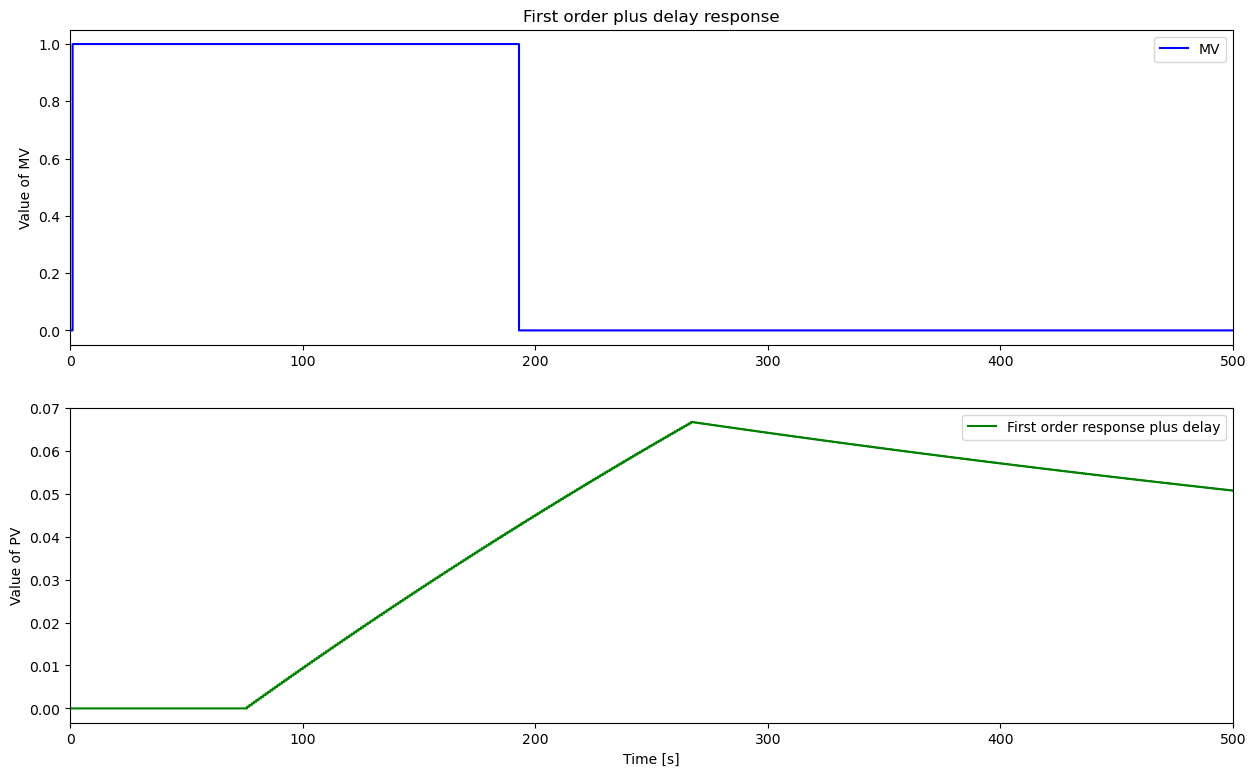

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

TSim = 500
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 1:1 ,280: 0, TSim: 3}

t = []
MV = []

# Parameters
K_SB = Kp_graph
T_SB = Tg_graph
theta_SB = Tu_graph

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV_SB = FOPDT(MVm,K_SB,T_SB,theta_SB,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(tm,MVm,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(tm,PV_SB,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])  

# Compare step responses (experiment compared with optimal FOPDT & SOPDT)

(0.0, 532.0)

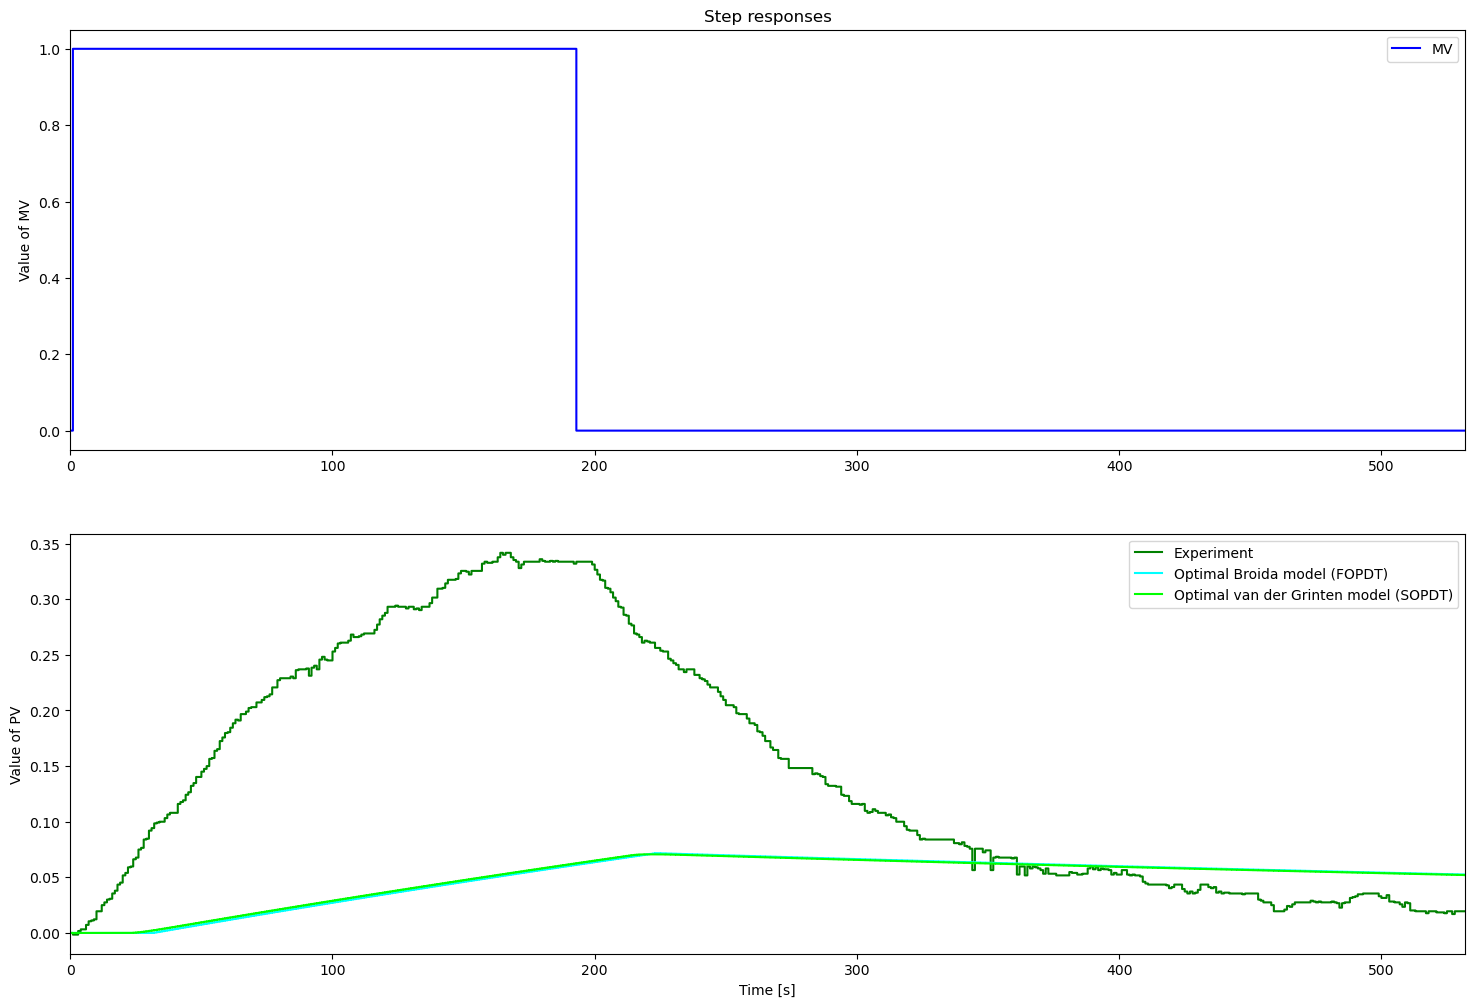

In [67]:
PV_SOPDTOPT = SOPDT(MVm,Kp_SOPDTOPT,T1_SOPDTOPT,T2_SOPDTOPT,theta_SOPDTOPT,Ts)
PV_FOPDTOPT = FOPDT(MVm,Kp_FOPDTOPT,T_FOPDTOPT,theta_FOPDTOPT,Ts)

plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
plt.step(tm,MVm,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Step responses')
plt.legend(loc='best')
plt.xlim([0, np.max(tm)])   

plt.subplot(2,1,2)
plt.step(tm,PVm,'g-',label='Experiment',where='post')
plt.step(tm,PV_FOPDTOPT,'cyan',label='Optimal Broida model (FOPDT)',where='post')
plt.step(tm,PV_SOPDTOPT,'lime',label='Optimal van der Grinten model (SOPDT)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')  
plt.xlim([0, np.max(tm)])

# Compare Bode diagrams (optimal FOPDT & SOPDT)

Text(0, 0.5, 'Phase [°]')

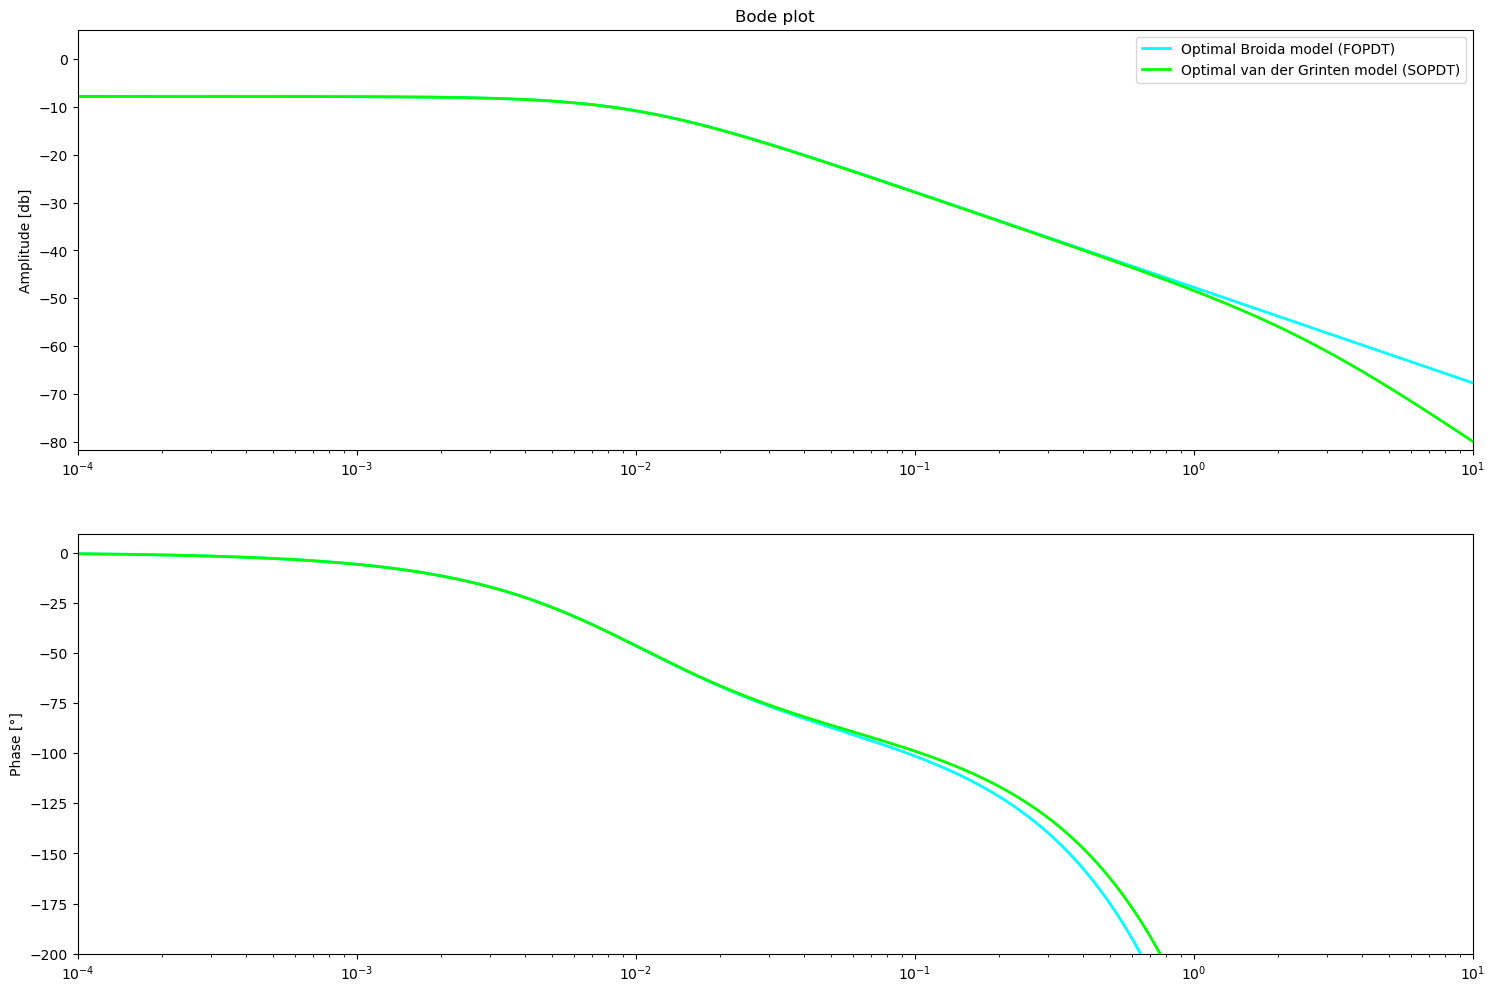

In [56]:
# Frequency response
P_FOPDTOPT = Process({})
P_FOPDTOPT.parameters['Kp'] = Kp_FOPDTOPT
P_FOPDTOPT.parameters['Tlag1'] = T_FOPDTOPT
P_FOPDTOPT.parameters['theta'] = theta_FOPDTOPT

# Frequency response
P_SOPDTOPT = Process({})
P_SOPDTOPT.parameters['Kp'] = Kp_SOPDTOPT
P_SOPDTOPT.parameters['Tlag1'] = T1_SOPDTOPT
P_SOPDTOPT.parameters['Tlag2'] = T2_SOPDTOPT
P_SOPDTOPT.parameters['theta'] = theta_SOPDTOPT

omega = np.logspace(-4, 1, 10000)
Ps_FOPDTOPT = Bode(P_FOPDTOPT,omega,Show=False) # Optimal Broida
Ps_SOPDTOPT = Bode(P_SOPDTOPT,omega,Show=False) # Optimal van der Grinten

plt.figure(figsize = (18,12))

plt.subplot(2,1,1)
gain_min = np.min(20*np.log10(np.abs(Ps_FOPDTOPT)/5))
gain_max = np.max(20*np.log10(np.abs(Ps_FOPDTOPT)*5))
plt.semilogx(omega,20*np.log10(np.abs(Ps_FOPDTOPT)),'cyan',linewidth=2,label='Optimal Broida model (FOPDT)')
plt.semilogx(omega,20*np.log10(np.abs(Ps_SOPDTOPT)),'lime',linewidth=2,label='Optimal van der Grinten model (SOPDT)')
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([gain_min, gain_max])
plt.ylabel('Amplitude [db]')
plt.title('Bode plot')
plt.legend(loc='best')

plt.subplot(2,1,2)
ph_min = np.min((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) - 10
ph_max = np.max((180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT))) + 10
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_FOPDTOPT)),'cyan',linewidth=2)
plt.semilogx(omega, (180/np.pi)*np.unwrap(np.angle(Ps_SOPDTOPT)),'lime',linewidth=2)
plt.xlim([np.min(omega), np.max(omega)])
plt.ylim([np.max([ph_min, -200]), ph_max])
plt.ylabel('Phase [°]')